In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf


from sklearn.linear_model  import LinearRegression
from sklearn.svm import SVR


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer


from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_predict,RandomizedSearchCV,validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
#from skopt import BayesSearchCV

from hyperopt import hp, fmin, tpe, STATUS_OK, Trials,rand
from hyperopt.pyll.base import scope 

def mae(y_orig,y_pred):
    abs_error = abs(y_orig-y_pred)
    return (np.mean(abs_error) / np.mean(y_orig))*100
def rmse(y_true,y_pred):
    return (mse(y_true,y_pred))**0.5
from sklearn.model_selection import cross_validate

import warnings
warnings.simplefilter("ignore")


import xgboost as  xgb

from scipy.stats import linregress

In [12]:
df = pd.read_excel('DATA.xlsx',dtype=np.longfloat)

#Removing Missing Values
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
df = imputer.fit_transform(df)
X = df[:,:-1]
y = df[:,9]

#Splitiing the datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=22)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.10,random_state=22)

#Standardizing the data
scaler = StandardScaler()
X_train_sca = scaler.fit_transform(X_train)
X_val_sca = scaler.transform(X_val)
X_test_sca = scaler.transform(X_test)

print("Size of Training = ",y_train.shape)
print("Size of Validation",y_val.shape)
print("Size of Testing",y_test.shape)

Size of Training =  (11241,)
Size of Validation (1250,)
Size of Testing (1388,)


In [13]:
df1 = pd.read_excel('DATA.xlsx',dtype=np.longfloat)

In [14]:
df1.head()

,DEPTH,SONIC DELAY,GAMMA RAY DENSITY,GAMMA RAY SONIC,DEEP RES,MID RES,SHALLOW RES,NEUTRON POROSITY,SP,TOC
0,3059.5,112.347,35.301,30.810,1.109,1.506,1.507,0.568,-91.829,17.519736
1,3060.0,112.367,36.343,31.347,1.262,1.689,1.948,0.538,-91.164,16.980711
2,3060.5,111.822,37.385,32.622,1.478,1.960,2.518,0.519,-90.500,16.519802
3,3061.0,110.574,38.428,33.892,1.732,2.344,3.014,0.508,-89.834,16.379133
4,3061.5,109.952,38.106,34.461,2.053,2.804,3.289,0.511,-89.989,16.555054


In [27]:
plt.subplot?

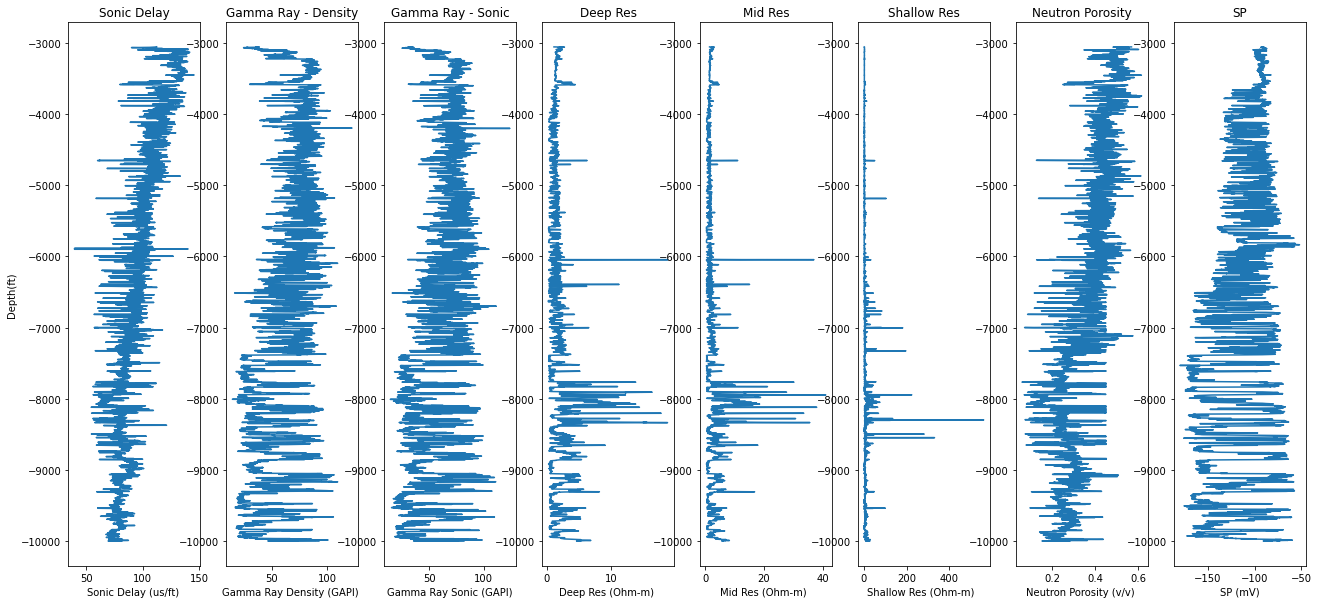

In [45]:
plt.figure(figsize=(25,10))
plt.subplot(1, 9, 1) # row 1, col 2 index 1
plt.plot(df1['SONIC DELAY'], -df1['DEPTH'])
plt.title("Sonic Delay")
plt.xlabel('Sonic Delay (us/ft) ')
plt.ylabel('Depth(ft)')

plt.subplot(1, 9 ,2) # index 2
plt.plot(df1['GAMMA RAY DENSITY'], -df1['DEPTH'])
plt.title("Gamma Ray - Density")
plt.xlabel('Gamma Ray Density (GAPI) ')
#plt.ylabel('Depth ')

plt.subplot(1, 9, 3) # index 3
plt.plot(df1['GAMMA RAY SONIC'], -df1['DEPTH'])
plt.title("Gamma Ray - Sonic")
plt.xlabel('Gamma Ray Sonic (GAPI)')

plt.subplot(1, 9, 4) # index 4
plt.plot(df1['DEEP RES'], -df1['DEPTH'])
plt.title("Deep Res")
plt.xlabel('Deep Res (Ohm-m) ')

plt.subplot(1, 9, 5) # index 5
plt.plot(df1['MID RES'], -df1['DEPTH'])
plt.title("Mid Res")
plt.xlabel('Mid Res (Ohm-m)  ')


plt.subplot(1, 9 ,6) # index 6
plt.plot(df1['SHALLOW RES'], -df1['DEPTH'])
plt.title("Shallow Res")
plt.xlabel('Shallow Res (Ohm-m)  ')

plt.subplot(1, 9 ,7) # index 7
plt.plot(df1['NEUTRON POROSITY'], -df1['DEPTH'])
plt.title("Neutron Porosity")
plt.xlabel('Neutron Porosity (v/v) ')

plt.subplot(1, 9,8) # index 8
plt.plot(df1['SP'], -df1['DEPTH'])
plt.title("SP")
plt.xlabel('SP (mV)')

plt.savefig("plot_input.png",dpi=200)
plt.show()




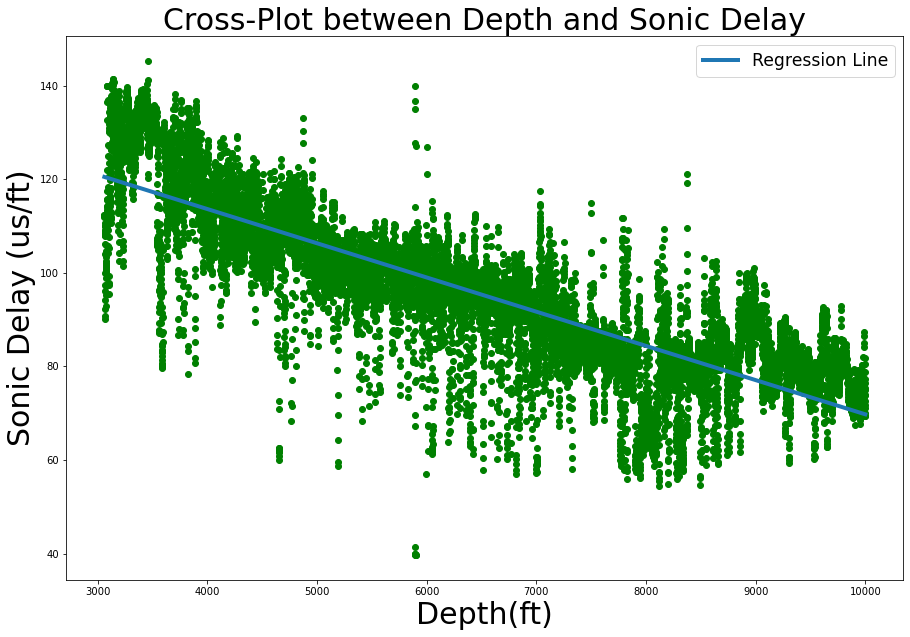

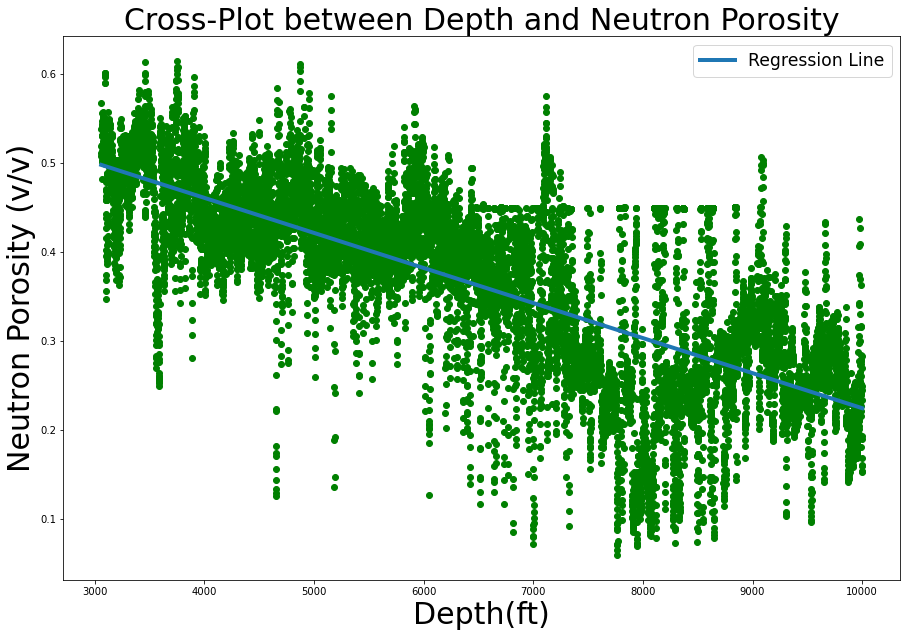

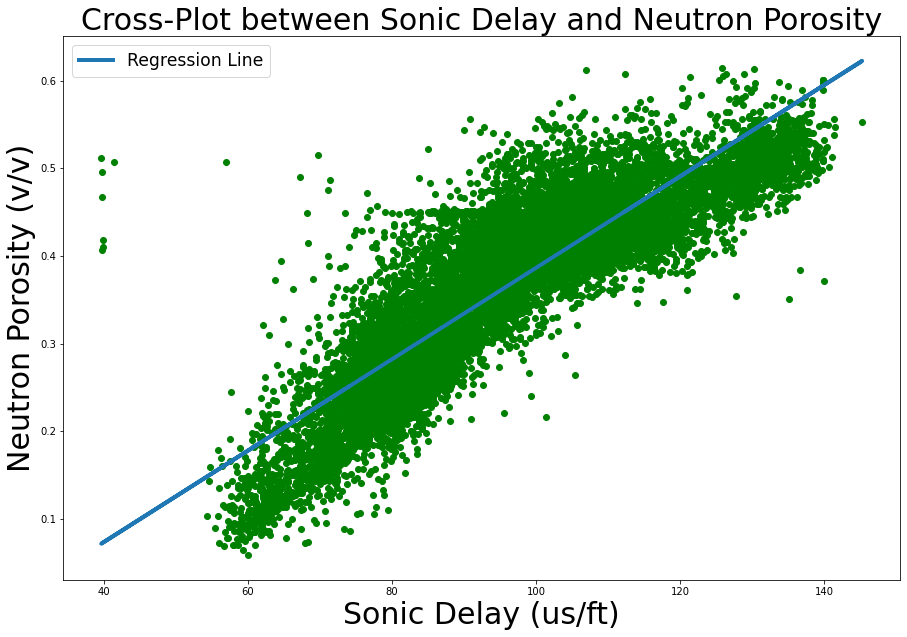

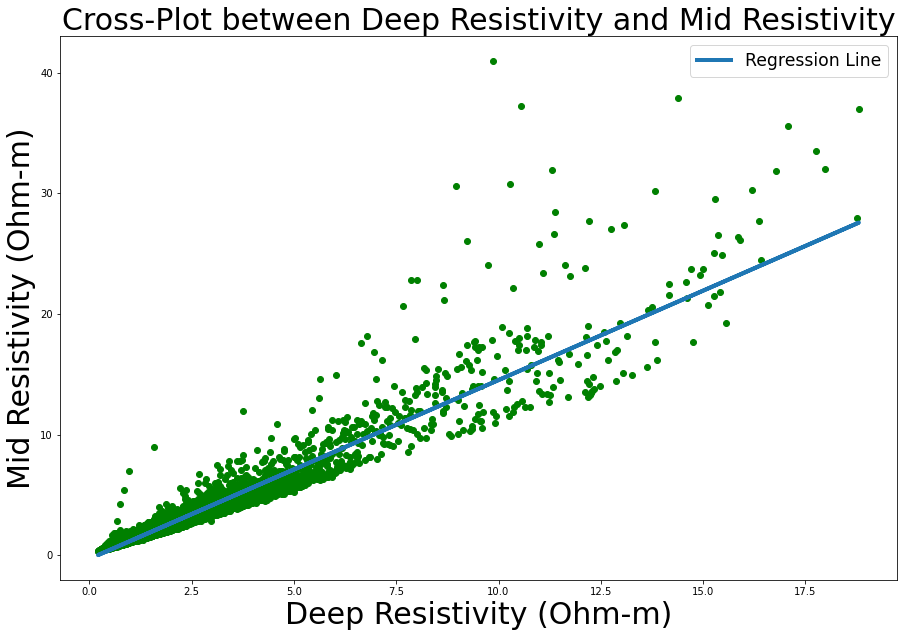

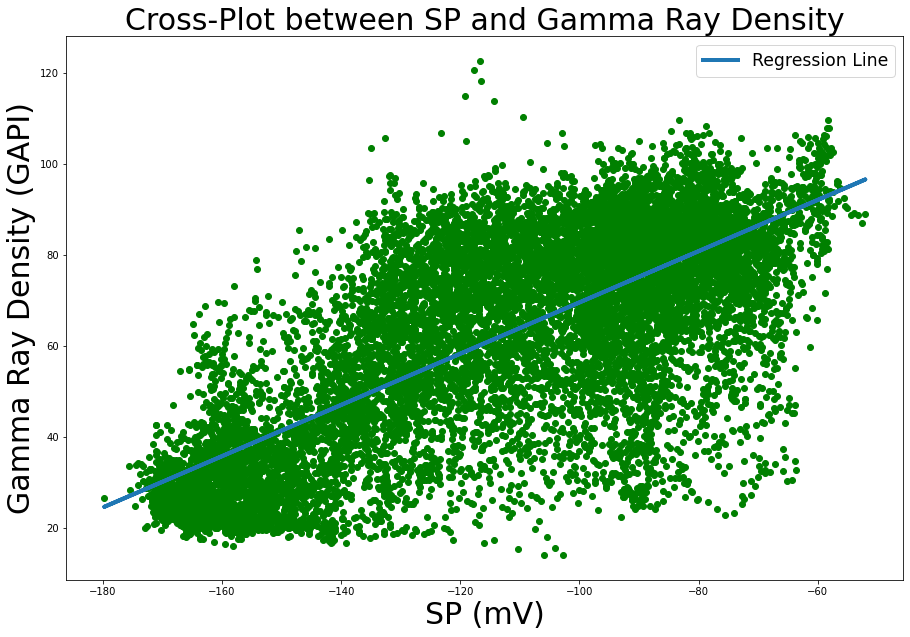

In [10]:
plt.figure(figsize=(15,10))
plt.xlabel("Depth(ft)",size=30)
plt.ylabel("Sonic Delay (us/ft)",size=30)
plt.scatter(df1['DEPTH'],df1['SONIC DELAY'],color='green')
slope = linregress(df1['DEPTH'],df1['SONIC DELAY'])[0]
intercept = linregress(df1['DEPTH'],df1['SONIC DELAY'])[1]
plt.plot(df1['DEPTH'], slope*df1['DEPTH'] + intercept,label="Regression Line",linewidth=4)
plt.legend(loc='best',fontsize='xx-large')
plt.title("Cross-Plot between Depth and Sonic Delay",size=30)
plt.savefig("CP-depth-sonic.jpg")
plt.show()


plt.figure(figsize=(15,10))
plt.xlabel("Depth(ft)",size=30)
plt.ylabel("Neutron Porosity (v/v)",size=30)
plt.scatter(df1['DEPTH'],df1['NEUTRON POROSITY'],color='green')
slope = linregress(df1['DEPTH'],df1['NEUTRON POROSITY'])[0]
intercept = linregress(df1['DEPTH'],df1['NEUTRON POROSITY'])[1]
plt.plot(df1['DEPTH'], slope*df1['DEPTH'] + intercept,label="Regression Line",linewidth=4)
plt.legend(loc='best',fontsize='xx-large')
plt.title("Cross-Plot between Depth and Neutron Porosity",size=30)
plt.savefig("CP-depth-neutron_porosity.jpg")
plt.show()


plt.figure(figsize=(15,10))
plt.xlabel("Sonic Delay (us/ft)",size=30)
plt.ylabel("Neutron Porosity (v/v)",size=30)
plt.scatter(df1['SONIC DELAY'],df1['NEUTRON POROSITY'],color='green')
slope = linregress(df1['SONIC DELAY'],df1['NEUTRON POROSITY'])[0]
intercept = linregress(df1['SONIC DELAY'],df1['NEUTRON POROSITY'])[1]
plt.plot(df1['SONIC DELAY'], slope*df1['SONIC DELAY'] + intercept,label="Regression Line",linewidth=4)
plt.legend(loc='best',fontsize='xx-large')
plt.title("Cross-Plot between Sonic Delay and Neutron Porosity",size=30)
plt.savefig("CP-sonic-neutron_porosity.jpg")
plt.show()


plt.figure(figsize=(15,10))
plt.xlabel("Deep Resistivity (Ohm-m)",size=30)
plt.ylabel("Mid Resistivity (Ohm-m)",size=30)
plt.scatter(df1['DEEP RES'],df1['MID RES'],color='green')
slope = linregress(df1['DEEP RES'],df1['MID RES'])[0]
intercept = linregress(df1['DEEP RES'],df1['MID RES'])[1]
plt.plot(df1['DEEP RES'], slope*df1['DEEP RES'] + intercept,label="Regression Line",linewidth=4)
plt.legend(loc='best',fontsize='xx-large')
plt.title("Cross-Plot between Deep Resistivity and Mid Resistivity",size=30)
plt.savefig("CP-deep-mid.jpg")
plt.show()


plt.figure(figsize=(15,10))
plt.xlabel("SP (mV)",size=30)
plt.ylabel("Gamma Ray Density (GAPI)",size=30)
plt.scatter(df1['SP'],df1['GAMMA RAY DENSITY'],color='green')
slope = linregress(df1['SP'],df1['GAMMA RAY DENSITY'])[0]
intercept =linregress(df1['SP'],df1['GAMMA RAY DENSITY'])[1]
plt.plot(df1['SP'], slope*df1['SP'] + intercept,label="Regression Line",linewidth=4)
plt.legend(loc='best',fontsize='xx-large')
plt.title("Cross-Plot between SP and Gamma Ray Density",size=30)
plt.savefig("CP-sp_gammaDENSity.jpg")
plt.show()

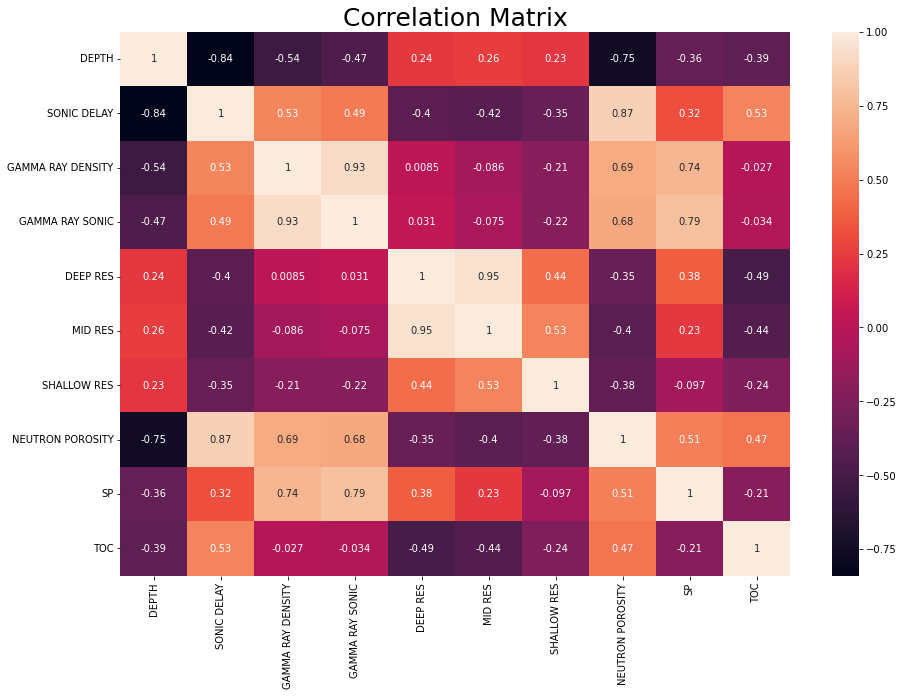

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.title("Correlation Matrix",size=25)
plt.savefig('correlation.jpg')
plt.show()


# SVR

In [80]:
C = 584.6570888436889
epsilon=0.5906437756604672
gamma=0.27102404571990846



model = SVR(C=C,epsilon=epsilon,gamma=gamma)
model.fit(X_train_sca,y_train)

print("Training Score")
print("R2 -> ",r2(y_train,model.predict(X_train_sca)))
print("MSE -> ",mse(y_train,model.predict(X_train_sca)))
print("RMSE -> ",rmse(y_train,model.predict(X_train_sca)))
print("MAE -> ",mae(y_train,model.predict(X_train_sca)))


print("---------------------------------------------")
print("Validation Score")
print("R2 -> ",r2(y_val,model.predict(X_val_sca)))
print("MSE -> ",mse(y_val,model.predict(X_val_sca)))
print("RMSE -> ",rmse(y_val,model.predict(X_val_sca)))
print("MAE -> ",mae(y_val,model.predict(X_val_sca)))


print("---------------------------------------------")
print("Test Score")
print("R2 -> ",r2(y_test,model.predict(X_test_sca)))
print("MSE -> ",mse(y_test,model.predict(X_test_sca)))
print("RMSE -> ",rmse(y_test,model.predict(X_test_sca)))
print("MAE -> ",mae(y_test,model.predict(X_test_sca)))



Training Score
R2 ->  0.88438392495548
MSE ->  1.2910012456248272
RMSE ->  1.1362223574744634
MAE ->  9.095245538573433
---------------------------------------------
Validation Score
R2 ->  0.8346862318887611
MSE ->  1.8990955824341007
RMSE ->  1.378076769426907
MAE ->  11.506797712986653
---------------------------------------------
Test Score
R2 ->  0.8149571505602662
MSE ->  1.9126265740987567
RMSE ->  1.3829774307987663
MAE ->  11.321469404725573


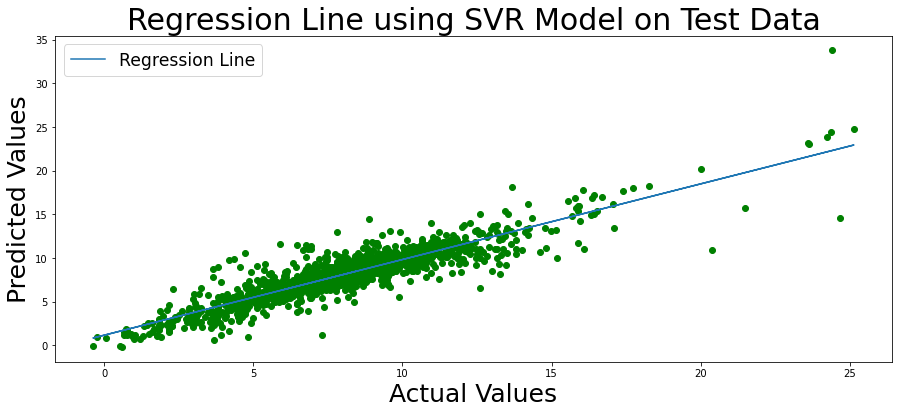

In [81]:
from scipy.stats import linregress
y_test_pred_SVR = model.predict(X_test_sca)

plt.figure(figsize=(15,6))
plt.scatter(y_test,y_test_pred_SVR,color='green')
plt.xlabel("Actual Values",size=25)
plt.ylabel("Predicted Values",size=25)
slope = linregress(y_test,y_test_pred_SVR)[0]
intercept = linregress(y_test,y_test_pred_SVR)[1]
plt.plot(y_test, slope*y_test + intercept,label="Regression Line")
plt.legend(loc='best',fontsize='xx-large')
plt.title("Regression Line using SVR Model on Test Data",size=30)
plt.savefig('reg_line_SVR.jpg')
plt.show()

# ANN

In [96]:
arr = ([65,45])
beta_1 = 0.7129
beta_2 = 0.275
activation='tanh'
batch_size = 128
max_iter = 600
alpha = 0.106


model = MLPRegressor(hidden_layer_sizes=arr,activation=activation,batch_size=batch_size,max_iter=max_iter,solver='adam',
                         beta_1=beta_1,beta_2=beta_2,shuffle=True,random_state=22,alpha=alpha)


model.fit(X_train_sca,y_train)

print("2 Layer Model")

print("---------------------------------------------")
print("Training Score")
print("R2 -> ",r2(y_train,model.predict(X_train_sca)))
print("MSE -> ",mse(y_train,model.predict(X_train_sca)))
print("RMSE -> ",rmse(y_train,model.predict(X_train_sca)))
print("MAE -> ",mae(y_train,model.predict(X_train_sca)))


print("---------------------------------------------")
print("Validation Score")
print("R2 -> ",r2(y_val,model.predict(X_val_sca)))
print("MSE -> ",mse(y_val,model.predict(X_val_sca)))
print("RMSE -> ",rmse(y_val,model.predict(X_val_sca)))
print("MAE -> ",mae(y_val,model.predict(X_val_sca)))


print("---------------------------------------------")
print("Test Score")
print("R2 -> ",r2(y_test,model.predict(X_test_sca)))
print("MSE -> ",mse(y_test,model.predict(X_test_sca)))
print("RMSE -> ",rmse(y_test,model.predict(X_test_sca)))
print("MAE -> ",mae(y_test,model.predict(X_test_sca)))


2 Layer Model
---------------------------------------------
Training Score
R2 ->  0.8585393340036516
MSE ->  1.5795891353160036
RMSE ->  1.2568170651753594
MAE ->  10.573846170404515
---------------------------------------------
Validation Score
R2 ->  0.8306104013867224
MSE ->  1.9459180085974404
RMSE ->  1.3949616512999345
MAE ->  12.02332828052591
---------------------------------------------
Test Score
R2 ->  0.8089589615043304
MSE ->  1.974624623845539
RMSE ->  1.4052133730667165
MAE ->  11.821638684450349


# XGB

Initial Model
---------------------------------------------
Training Score
R2 ->  0.8799395360684582
MSE ->  1.3406285278775496
RMSE ->  1.157855141145709
MAE ->  10.1316140043685
---------------------------------------------
Validation Score
R2 ->  0.8419650664009871
MSE ->  1.8154776078069932
RMSE ->  1.3473966037536955
MAE ->  11.803008982687857
---------------------------------------------
Test Score
R2 ->  0.8303632740619372
MSE ->  1.7533869098676875
RMSE ->  1.3241551683498756
MAE ->  11.5584335985262


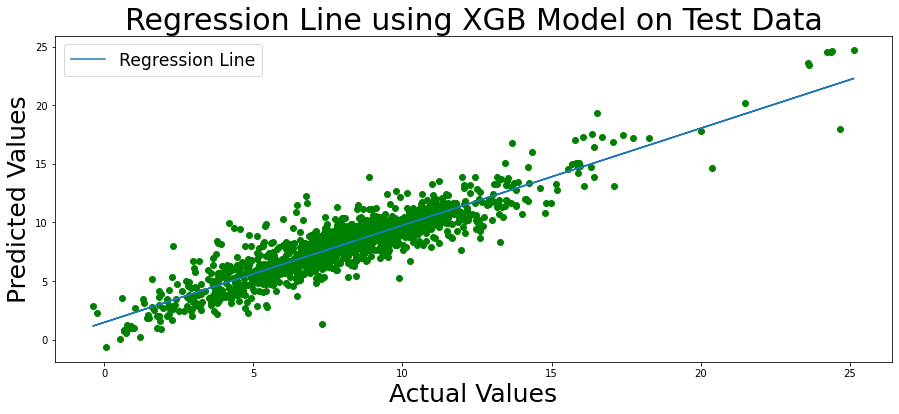

In [83]:
model = xgb.XGBRegressor(n_estimators=110, max_depth=4, eta=0.2, subsample=0.7, colsample_bytree=0.9,reg_alpha=0.09,reg_lambda=0.202)
model.fit(X_train_sca,y_train)
print("Initial Model")

print("---------------------------------------------")
print("Training Score")
print("R2 -> ",r2(y_train,model.predict(X_train_sca)))
print("MSE -> ",mse(y_train,model.predict(X_train_sca)))
print("RMSE -> ",rmse(y_train,model.predict(X_train_sca)))
print("MAE -> ",mae(y_train,model.predict(X_train_sca)))


print("---------------------------------------------")
print("Validation Score")
print("R2 -> ",r2(y_val,model.predict(X_val_sca)))
print("MSE -> ",mse(y_val,model.predict(X_val_sca)))
print("RMSE -> ",rmse(y_val,model.predict(X_val_sca)))
print("MAE -> ",mae(y_val,model.predict(X_val_sca)))


print("---------------------------------------------")
print("Test Score")
print("R2 -> ",r2(y_test,model.predict(X_test_sca)))
print("MSE -> ",mse(y_test,model.predict(X_test_sca)))
print("RMSE -> ",rmse(y_test,model.predict(X_test_sca)))
print("MAE -> ",mae(y_test,model.predict(X_test_sca)))

y_test_pred_xg = model.predict(X_test_sca)

plt.figure(figsize=(15,6))
plt.scatter(y_test,y_test_pred_xg,color='green')
plt.xlabel("Actual Values",size=25)
plt.ylabel("Predicted Values",size=25)
slope = linregress(y_test,y_test_pred_xg)[0]
intercept = linregress(y_test,y_test_pred_xg)[1]
plt.plot(y_test, slope*y_test + intercept,label="Regression Line")
plt.legend(loc='best',fontsize='xx-large')
plt.title("Regression Line using XGB Model on Test Data",size=30)
plt.savefig('reg_line_xgb.jpg')
plt.show()

# Ensemble

In [84]:
m1 = SVR(C=584.65,epsilon=0.59,gamma=0.271) 


arr = ([65,45])
beta_1 = 0.7129
beta_2 = 0.275
activation='tanh'
batch_size = 128
max_iter = 600
alpha = 0.106

m2 = MLPRegressor(hidden_layer_sizes=arr,activation=activation,batch_size=batch_size,max_iter=max_iter,solver='adam',
                         beta_1=beta_1,beta_2=beta_2,shuffle=True,random_state=22,alpha=alpha)

m3 = xgb.XGBRegressor(n_estimators=110, max_depth=4, eta=0.2, subsample=0.7, colsample_bytree=0.9,reg_alpha=0.09,reg_lambda=0.202)

In [85]:
m1.fit(X_train_sca,y_train)
m2.fit(X_train_sca,y_train)
m3.fit(X_train_sca,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False, eta=0.2,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.200000003, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=110, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.09, ...)

In [86]:
# Training Results

print("R2 Score")
print("SVR = ",r2(y_train,m1.predict(X_train_sca)))
print("ANN = ",r2(y_train,m2.predict(X_train_sca)))
print("XGB = ",r2(y_train,m3.predict(X_train_sca)))
xx = (m1.predict(X_train_sca)+m2.predict(X_train_sca)+m3.predict(X_train_sca))/3
print("Ensemble = ",r2(y_train,xx))

print("MSE Score")
print("SVR = ",mse(y_train,m1.predict(X_train_sca)))
print("ANN = ",mse(y_train,m2.predict(X_train_sca)))
print("XGB = ",mse(y_train,m3.predict(X_train_sca)))
xx = (m1.predict(X_train_sca)+m2.predict(X_train_sca)+m3.predict(X_train_sca))/3
print("Ensemble = ",mse(y_train,xx))

print("RMSE Score")
print("SVR = ",rmse(y_train,m1.predict(X_train_sca)))
print("ANN = ",rmse(y_train,m2.predict(X_train_sca)))
print("XGB = ",rmse(y_train,m3.predict(X_train_sca)))
xx = (m1.predict(X_train_sca)+m2.predict(X_train_sca)+m3.predict(X_train_sca))/3
print("Ensemble = ",rmse(y_train,xx))

print("MAE Score")
print("SVR = ",mae(y_train,m1.predict(X_train_sca)))
print("ANN = ",mae(y_train,m2.predict(X_train_sca)))
print("XGB = ",mae(y_train,m3.predict(X_train_sca)))
xx = (m1.predict(X_train_sca)+m2.predict(X_train_sca)+m3.predict(X_train_sca))/3
print("Ensemble = ",mae(y_train,xx))

R2 Score
SVR =  0.884382762242281
ANN =  0.8585393340036516
XGB =  0.8799395360684582
Ensemble =  0.8900071557082486
MSE Score
SVR =  1.2910142288037467
ANN =  1.5795891353160036
XGB =  1.3406285278775496
Ensemble =  1.228210687275007
RMSE Score
SVR =  1.1362280707691335
ANN =  1.2568170651753594
XGB =  1.157855141145709
Ensemble =  1.1082466725756532
MAE Score
SVR =  9.094199349352797
ANN =  10.573846170404515
XGB =  10.1316140043685
Ensemble =  9.263640285430762


In [87]:
# Validation Results

print("R2 Score")
print("SVR = ",r2(y_val,m1.predict(X_val_sca)))
print("ANN = ",r2(y_val,m2.predict(X_val_sca)))
print("XGB = ",r2(y_val,m3.predict(X_val_sca)))
xx = (m1.predict(X_val_sca)+m2.predict(X_val_sca)+m3.predict(X_val_sca))/3
print("Ensemble = ",r2(y_val,xx))

print("MSE Score")
print("SVR = ",mse(y_val,m1.predict(X_val_sca)))
print("ANN = ",mse(y_val,m2.predict(X_val_sca)))
print("XGB = ",mse(y_val,m3.predict(X_val_sca)))
xx = (m1.predict(X_val_sca)+m2.predict(X_val_sca)+m3.predict(X_val_sca))/3
print("Ensemble = ",mse(y_val,xx))

print("RMSE Score")
print("SVR = ",rmse(y_val,m1.predict(X_val_sca)))
print("ANN = ",rmse(y_val,m2.predict(X_val_sca)))
print("XGB = ",rmse(y_val,m3.predict(X_val_sca)))
xx = (m1.predict(X_val_sca)+m2.predict(X_val_sca)+m3.predict(X_val_sca))/3
print("Ensemble = ",rmse(y_val,xx))

print("MAE Score")
print("SVR = ",mae(y_val,m1.predict(X_val_sca)))
print("ANN = ",mae(y_val,m2.predict(X_val_sca)))
print("XGB = ",mae(y_val,m3.predict(X_val_sca)))
xx = (m1.predict(X_val_sca)+m2.predict(X_val_sca)+m3.predict(X_val_sca))/3
print("Ensemble = ",mae(y_val,xx))

R2 Score
SVR =  0.834695643016609
ANN =  0.8306104013867224
XGB =  0.8419650664009871
Ensemble =  0.8574147048429515
MSE Score
SVR =  1.8989874690475037
ANN =  1.9459180085974404
XGB =  1.8154776078069932
Ensemble =  1.6379948702796767
RMSE Score
SVR =  1.3780375426843434
ANN =  1.3949616512999345
XGB =  1.3473966037536955
Ensemble =  1.2798417364188732
MAE Score
SVR =  11.505939094416824
ANN =  12.02332828052591
XGB =  11.803008982687857
Ensemble =  10.934482330132152


In [88]:
# Test Results

print("R2 Score")
print("SVR = ",r2(y_test,m1.predict(X_test_sca)))
print("ANN = ",r2(y_test,m2.predict(X_test_sca)))
print("XGB = ",r2(y_test,m3.predict(X_test_sca)))
xx = (m1.predict(X_test_sca)+m2.predict(X_test_sca)+m3.predict(X_test_sca))/3
print("Ensemble = ",r2(y_test,xx))

print("MSE Score")
print("SVR = ",mse(y_test,m1.predict(X_test_sca)))
print("ANN = ",mse(y_test,m2.predict(X_test_sca)))
print("XGB = ",mse(y_test,m3.predict(X_test_sca)))
xx = (m1.predict(X_test_sca)+m2.predict(X_test_sca)+m3.predict(X_test_sca))/3
print("Ensemble = ",mse(y_test,xx))


print("RMSE Score")
print("SVR = ",rmse(y_test,m1.predict(X_test_sca)))
print("ANN = ",rmse(y_test,m2.predict(X_test_sca)))
print("XGB = ",rmse(y_test,m3.predict(X_test_sca)))
xx = (m1.predict(X_test_sca)+m2.predict(X_test_sca)+m3.predict(X_test_sca))/3
print("Ensemble = ",rmse(y_test,xx))

print("MAE Score")
print("SVR = ",mae(y_test,m1.predict(X_test_sca)))
print("ANN = ",mae(y_test,m2.predict(X_test_sca)))
print("XGB = ",mae(y_test,m3.predict(X_test_sca)))
xx = (m1.predict(X_test_sca)+m2.predict(X_test_sca)+m3.predict(X_test_sca))/3
print("Ensemble = ",mae(y_test,xx))

R2 Score
SVR =  0.8149638150418375
ANN =  0.8089589615043304
XGB =  0.8303632740619372
Ensemble =  0.8436755166747467
MSE Score
SVR =  1.9125576891642975
ANN =  1.974624623845539
XGB =  1.7533869098676875
Ensemble =  1.615789866484492
RMSE Score
SVR =  1.3829525259980175
ANN =  1.4052133730667165
XGB =  1.3241551683498756
Ensemble =  1.2711372335371551
MAE Score
SVR =  11.320849156762637
ANN =  11.821638684450349
XGB =  11.5584335985262
Ensemble =  10.730568062800305


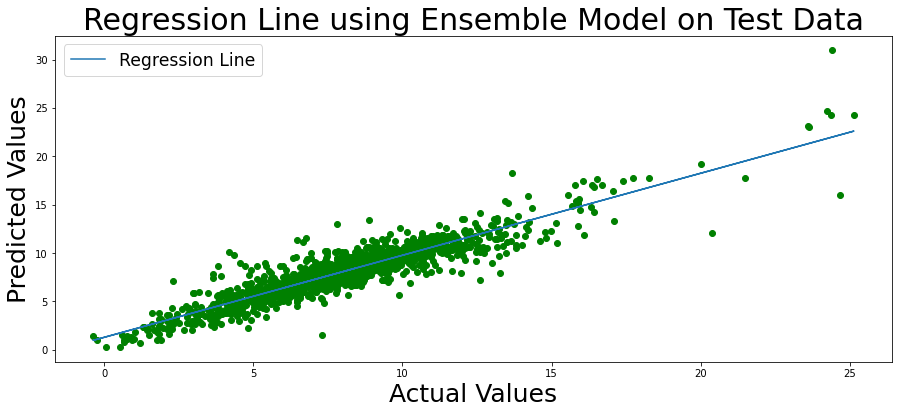

In [89]:
y_test_pred_ens = (m1.predict(X_test_sca)+m2.predict(X_test_sca)+m3.predict(X_test_sca))/3

plt.figure(figsize=(15,6))
plt.scatter(y_test,y_test_pred_ens,color='green')
plt.xlabel("Actual Values",size=25)
plt.ylabel("Predicted Values",size=25)
slope = linregress(y_test,y_test_pred_ens)[0]
intercept = linregress(y_test,y_test_pred_ens)[1]
plt.plot(y_test, slope*y_test + intercept,label="Regression Line")
plt.legend(loc='best',fontsize='xx-large')
plt.title("Regression Line using Ensemble Model on Test Data",size=30)
plt.savefig('reg_line_ensemble.jpg')
plt.show()

# Validation

In [90]:
from scipy.stats import linregress
def R0_squared (y_orig,y_pred):
    k = linregress(y_orig,y_pred)[0]
    k_dash = linregress(y_pred,y_orig)[0]
    num = np.sum((y_pred - (k*y_pred))**2)
    den = np.sum((y_pred - np.mean(k_dash*y_orig))**2)
    return 1 - (num / den)

def R0_dash_squared (y_orig,y_pred):
    k = linregress(y_orig,y_pred)[0]
    k_dash = linregress(y_pred,y_orig)[0]
    num = np.sum((y_orig - (k_dash*y_orig))**2)
    den = np.sum((y_orig - np.mean(k*y_pred))**2)
    return 1 - (num / den)

def R_m (y_orig,y_pred):
    R_2 = r2(y_orig,y_pred)
    R0_2 = R0_squared(y_orig,y_pred)
    return R_2 * (1 - (abs(R_2 - R0_2))**0.5)

## SVR Val

In [91]:
y_test_pred_SVR = m1.predict(X_test_sca)

print("K = ", linregress(y_test,y_test_pred_SVR)[0])
print("K' = ",linregress(y_test_pred_SVR,y_test)[0])
print("R2 =  ",r2(y_test,y_test_pred_SVR))
print("R0-Square = ",R0_squared(y_test,y_test_pred_SVR))
print("R0-dash-Square = ", R0_dash_squared(y_test,y_test_pred_SVR))
print("Rm = ",R_m(y_test,y_test_pred_SVR))

K =  0.8669924759901628
K' =  0.9437322482376278
R2 =   0.8149638150418375
R0-Square =  0.8588314506951841
R0-dash-Square =  0.9784299859854425
Rm =  0.6442728868378811


## ANN Val

In [92]:
y_test_pred_ANN = m2.predict(X_test_sca)

print("K = ", linregress(y_test,y_test_pred_ANN)[0])
print("K' = ",linregress(y_test_pred_ANN,y_test)[0])
print("R2 =  ",r2(y_test,y_test_pred_ANN))
print("R0-Square = ",R0_squared(y_test,y_test_pred_ANN))
print("R0-dash-Square = ", R0_dash_squared(y_test,y_test_pred_ANN))
print("Rm = ",R_m(y_test,y_test_pred_ANN))

K =  0.8486950086929125
K' =  0.9552829389506011
R2 =   0.8089589615043304
R0-Square =  0.8119036706644379
R0-dash-Square =  0.986926098110146
Rm =  0.7650606623203614


## XGB Val

In [93]:
y_test_pred_X = m3.predict(X_test_sca)

print("K = ", linregress(y_test,y_test_pred_X)[0])
print("K' = ",linregress(y_test_pred_X,y_test)[0])
print("R2 =  ",r2(y_test,y_test_pred_X))
print("R0-Square = ",R0_squared(y_test,y_test_pred_X))
print("R0-dash-Square = ", R0_dash_squared(y_test,y_test_pred_X))
print("Rm = ",R_m(y_test,y_test_pred_X))

K =  0.8283102314119459
K' =  1.0029617331811909
R2 =   0.8303632740619372
R0-Square =  0.7339479625225067
R0-dash-Square =  0.9999439588637672
Rm =  0.5725287095731268


## ENSEMBLE Val

In [94]:
y_test_pred_ens = (m1.predict(X_test_sca)+m2.predict(X_test_sca)+m3.predict(X_test_sca))/3

print("K = ", linregress(y_test,y_test_pred_ens)[0])
print("K' = ",linregress(y_test_pred_ens,y_test)[0])
print("R2 =  ",r2(y_test,y_test_pred_ens))
print("R0-Square = ",R0_squared(y_test,y_test_pred_ens))
print("R0-dash-Square = ", R0_dash_squared(y_test,y_test_pred_ens))
print("Rm = ",R_m(y_test,y_test_pred_ens))

K =  0.8479992386983402
K' =  0.9950884527788163
R2 =   0.8436755166747467
R0-Square =  0.7984242438535547
R0-dash-Square =  0.9998411492780716
Rm =  0.664205936917262
